# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +60.33570924765                   -2.48    3.89s
  2   +53.78748110071        0.82       -1.34   10.0ms
  3   +38.60771010788        1.18       -0.95   41.8ms
  4   +29.43021189434        0.96       -0.81   13.7ms
  5   +28.43126233199       -0.00       -0.72   28.5ms
  6   +13.68709281475        1.17       -0.66   11.8ms
  7   +9.290601560674        0.64       -0.61   13.2ms
  8   +7.317939987105        0.30       -0.64   13.3ms
  9   +6.870665632842       -0.35       -0.58   8.17ms
 10   +6.570701315746       -0.52       -0.65   11.4ms
 11   +6.324739859698       -0.61       -0.72   8.29ms
 12   +6.089650995011       -0.63       -0.81   11.7ms
 13   +5.805951800608       -0.55       -0.79   11.6ms
 14   +5.688030298244       -0.93       -0.79   8.39ms
 15   +5.624417400283       -1.20       -0.75   11.6ms
 16   +5.590420199692       -1.47       -0.90   11.4ms
 17   +5.57

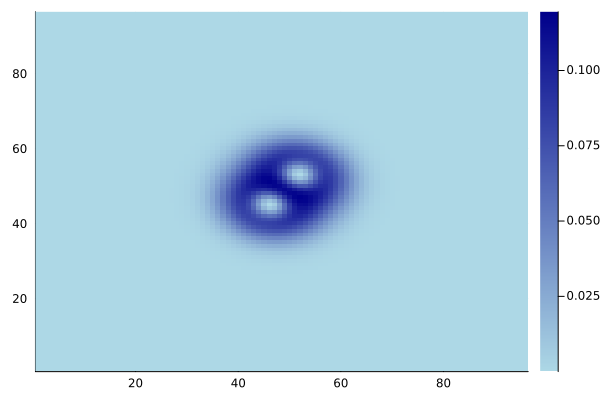

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)